Notebook for viewing detailed activity data.

Data obtained by requesting a comprehensive data export from Garmin (https://www.garmin.com/en-US/account/datamanagement/exportdata).

In [203]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import os, sys
import pandas as pd
import json
from datetime import datetime as dt
from datetime import timedelta
import matplotlib.dates as mdates

datadir = 'data'

def digital_time_to_minutes(timestr):
    to_minutes = [60,1,1/60]
    hrs,mins,secs = [conv*float(x) for x,conv in zip(timestr.split(':'), to_minutes)]
    minutes = hrs + mins + secs
    return minutes

def get_minutes_difference(timestr1, timestr2):
    """
    for two timestamp strings hh:mm:ss.f, compute their difference in minutes

    returns minutes as a float
    """
    diff = dt.strptime(timestr2, '%H:%M:%S.%f') - dt.strptime(timestr1, '%H:%M:%S.%f')
    return int(diff.seconds/60 + 0.5)

## explore Garmin data file structure - run first

In [3]:
os.listdir('./data/')

['Activities_20250110.csv', 'garmin_data_20250114', 'garmin_data_20250114.zip']

In [4]:
connect_dir = './data/garmin_data_20250114/DI_CONNECT'
os.listdir(connect_dir)

['DI-Connect-Aggregator',
 'DI-Connect-Fitness',
 'DI-Connect-Metrics',
 'DI-Connect-Uploaded-Files',
 'DI-Connect-User',
 'DI-Connect-Wellness',
 'DI-GOLF']

### Wellness

In [5]:
subdir = os.path.join(connect_dir, 'DI-Connect-Wellness')
files = os.listdir(subdir)
sizes = [os.path.getsize(os.path.join(subdir,f)) for f in files]
for f,s in zip(files,sizes):
    print(f,s, "B")

116924331_bioMetrics_latest.json 4 B
116924331_heartRateZones.json 213 B
116924331_userBioMetricProfileData.json 62 B
116924331_userBioMetrics.json 74648 B
2023-08-30_2023-12-08_116924331_sleepData.json 34908 B
2023-12-08_2024-03-17_116924331_sleepData.json 57275 B
2024-03-17_2024-06-25_116924331_sleepData.json 57596 B
2024-06-25_2024-10-03_116924331_sleepData.json 59062 B
2024-10-03_2025-01-11_116924331_sleepData.json 60521 B


In [6]:
fname = '2024-10-03_2025-01-11_116924331_sleepData.json'
with open(os.path.join(subdir, fname)) as f:
    flist = json.load(f)

for ls in flist:
    print(list(ls.keys()))

['sleepStartTimestampGMT', 'sleepEndTimestampGMT', 'calendarDate', 'sleepWindowConfirmationType', 'deepSleepSeconds', 'lightSleepSeconds', 'remSleepSeconds', 'awakeSleepSeconds', 'unmeasurableSeconds', 'spo2SleepSummary', 'averageRespiration', 'lowestRespiration', 'highestRespiration', 'retro']
['sleepStartTimestampGMT', 'sleepEndTimestampGMT', 'calendarDate', 'sleepWindowConfirmationType', 'deepSleepSeconds', 'lightSleepSeconds', 'remSleepSeconds', 'awakeSleepSeconds', 'unmeasurableSeconds', 'spo2SleepSummary', 'averageRespiration', 'lowestRespiration', 'highestRespiration', 'retro']
['sleepStartTimestampGMT', 'sleepEndTimestampGMT', 'calendarDate', 'sleepWindowConfirmationType', 'deepSleepSeconds', 'lightSleepSeconds', 'remSleepSeconds', 'awakeSleepSeconds', 'unmeasurableSeconds', 'spo2SleepSummary', 'averageRespiration', 'lowestRespiration', 'highestRespiration', 'retro']
['sleepStartTimestampGMT', 'sleepEndTimestampGMT', 'calendarDate', 'sleepWindowConfirmationType', 'deepSleepSeco

## Sleep Data

### misc testing

In [14]:
subdir = os.path.join(connect_dir, 'DI-Connect-Wellness')
files = os.listdir(subdir)
sizes = [os.path.getsize(os.path.join(subdir,f)) for f in files]
sleep_files = []
for f,s in zip(files,sizes):
    print(f,s, "B")
    if 'sleepData' in f:
        sleep_files.append(f)
print(sleep_files)

116924331_bioMetrics_latest.json 4 B
116924331_heartRateZones.json 213 B
116924331_userBioMetricProfileData.json 62 B
116924331_userBioMetrics.json 74648 B
2023-08-30_2023-12-08_116924331_sleepData.json 34908 B
2023-12-08_2024-03-17_116924331_sleepData.json 57275 B
2024-03-17_2024-06-25_116924331_sleepData.json 57596 B
2024-06-25_2024-10-03_116924331_sleepData.json 59062 B
2024-10-03_2025-01-11_116924331_sleepData.json 60521 B
['2023-08-30_2023-12-08_116924331_sleepData.json', '2023-12-08_2024-03-17_116924331_sleepData.json', '2024-03-17_2024-06-25_116924331_sleepData.json', '2024-06-25_2024-10-03_116924331_sleepData.json', '2024-10-03_2025-01-11_116924331_sleepData.json']


In [17]:
type(files)

str

In [18]:
fname = '2024-10-03_2025-01-11_116924331_sleepData.json'

content_list = []
for fname in sleep_files:
    with open(os.path.join(subdir, fname)) as f:
        content_list += json.load(f)

In [24]:
print(list(content_list[2].keys()))

['sleepStartTimestampGMT', 'sleepEndTimestampGMT', 'calendarDate', 'sleepWindowConfirmationType', 'deepSleepSeconds', 'lightSleepSeconds', 'remSleepSeconds', 'awakeSleepSeconds', 'unmeasurableSeconds', 'spo2SleepSummary', 'averageRespiration', 'lowestRespiration', 'highestRespiration', 'retro', 'userNote']


In [25]:
content_list[2]['calendarDate']

'2023-10-13'

In [33]:
content_list[2]['deepSleepSeconds']

7380

In [36]:
content_list[2]['sleepWindowConfirmationType']

'ENHANCED_CONFIRMED_FINAL'

In [20]:
content_list[0]['sleepStartTimestampGMT'], content_list[0]['sleepEndTimestampGMT']

('2023-10-11T04:00:00.0', '2023-10-11T12:00:00.0')

In [21]:
sleeptimestamp = content_list[0]['sleepStartTimestampGMT']
print(sleeptimestamp.split('T'))

sleeptimestamp = content_list[0]['sleepEndTimestampGMT']
print(sleeptimestamp.split('T'))

['2023-10-11', '04:00:00.0']
['2023-10-11', '12:00:00.0']


In [69]:
timestamp = '12:00:00.0'
hrs = 12
assert -11 <= hrs <= 13, "invalid timezone"
military_hrs = int(timestamp[:2]) + hrs
military_hrs = military_hrs if military_hrs > 0 else military_hrs + 24 
military_hrs = military_hrs if military_hrs < 24 else 24 - military_hrs
new_hrs = str(military_hrs)
hrs_digits = new_hrs if len(new_hrs) == 2 else '0' + new_hrs
timestamp = hrs_digits + timestamp[2:]
print(timestamp)

00:00:00.0


In [106]:
def timestamp_timezone_change(timestamp, hrs):
    """
    converts a timestamp to a different timezone by adding hrs (int) relative to GMT

    timestamp is a string formatted as hh:mm:ss.s.
    """
    assert -11 <= hrs <= 13, "invalid timezone"
    int_hrs = int(timestamp[:2]) + hrs
    int_hrs = int_hrs if int_hrs > -1 else int_hrs + 24
    new_hrs = str(int_hrs)
    hrs_digits = new_hrs if len(new_hrs) == 2 else '0' + new_hrs
    timestamp = hrs_digits + timestamp[2:]
    return timestamp

In [176]:
# create a dictionary of sleep data by date
sleep_by_date = {}

# adjust for timezone changes from moves and vacations
# for dates including and earlier than the date key, adjust GMT time by value (hours)
zone_changes = {
    '2025-01-11': -6, # day before move to Brookline
    '2035-12-31': -5  # arbitrarily far in the future
}

def get_next_timezone():
    for key, val in zone_changes.items():
        yield key, val

timechange_iter = get_next_timezone()
zone_change_date, hrs_from_GMT = next(timechange_iter)
change_zone = lambda timestamp: timestamp_timezone_change(timestamp, hrs_from_GMT)

for i,elem in enumerate(content_list):
    date = elem['calendarDate']
    if date > zone_change_date:
        zone_change_date, hrs_from_GMT = next(timechange_iter)
        change_zone = lambda timestamp: timestamp_timezone_change(timestamp, hrs_from_GMT)
    
    _, sleep_start_timestr = elem['sleepStartTimestampGMT'].split('T')
    _, sleep_end_timestr = elem['sleepEndTimestampGMT'].split('T')
    
    sleep_start_timestr = change_zone(sleep_start_timestr)
    sleep_end_timestr = change_zone(sleep_end_timestr)
    
    sleep_start_time = digital_time_to_minutes(sleep_start_timestr)
    sleep_end_time = digital_time_to_minutes(sleep_end_timestr)
    sleep_duration = sleep_end_time - sleep_start_time
    
    sleep_by_date[date] = {'datetimeDate': dt.strptime(date,'%Y-%m-%d'),
                           'sleepStartTime': dt.strptime(sleep_start_timestr, '%H:%M:%S.%f'), #.time(),
                           'sleepEndTime': dt.strptime(sleep_end_timestr, '%H:%M:%S.%f'), #.time(),
                           'sleepDurationMinutes': get_minutes_difference(sleep_start_timestr,sleep_end_timestr) 
                          }

    for key in [k for k in elem.keys() if 'Seconds' in k]:
        sleep_by_date[date][key.replace('Seconds','Minutes')] = elem[key]/60

    for key in [k for k in elem.keys() if 'Respiration' in k]:
        sleep_by_date[date][key] = elem[key]
    
    if i == 3:
        break

In [270]:
# create a dictionary of sleep data by date
sleep_by_date = {}

# adjust for timezone changes from moves and vacations
# for dates including and earlier than the date key, adjust GMT time by value (hours)
zone_changes = { 
    # '2024-07-14': -6, # todo: add London trip
    # '2024-07-22': 0,
    '2025-01-11': -6, # day before move to Brookline
    '2035-12-31': -5  # arbitrarily far in the future
}

def get_next_timezone():
    for key, val in zone_changes.items():
        yield key, val

dummy_dt = dt(1996, 7, 19) # dummy date used for sleep time start/stop

timechange_iter = get_next_timezone()
zone_change_date, hrs_from_GMT = next(timechange_iter)
change_zone = lambda timestamp: timestamp_timezone_change(timestamp, hrs_from_GMT)

for i,elem in enumerate(content_list):
    date = elem['calendarDate']
    if date > zone_change_date:
        zone_change_date, hrs_from_GMT = next(timechange_iter)
        change_zone = lambda timestamp: timestamp_timezone_change(timestamp, hrs_from_GMT)

    _, sleep_start_timestr = elem['sleepStartTimestampGMT'].split('T')
    _, sleep_end_timestr = elem['sleepEndTimestampGMT'].split('T')
    
    sleep_start_timestr = change_zone(sleep_start_timestr)
    sleep_end_timestr = change_zone(sleep_end_timestr)
    
    sleep_start_time = digital_time_to_minutes(sleep_start_timestr)
    sleep_end_time = digital_time_to_minutes(sleep_end_timestr)
    sleep_duration = sleep_end_time - sleep_start_time

    if sleep_start_timestr[:2] > sleep_end_timestr[:2]:
        start_dt = dummy_dt - timedelta(days=1) 
    else:
        start_dt = dummy_dt
    
    sleep_start_dt = dt.combine(start_dt, dt.strptime(sleep_start_timestr, '%H:%M:%S.%f').time())
    sleep_end_dt = dt.combine(dummy_dt, dt.strptime(sleep_end_timestr, '%H:%M:%S.%f').time())
    
    sleep_by_date[date] = {'datetimeDate': dt.strptime(date,'%Y-%m-%d'),
                           'sleepStartTime': sleep_start_dt, #.time(),
                           'sleepEndTime': sleep_end_dt, #.time(),
                           'sleepDurationMinutes': get_minutes_difference(sleep_start_timestr,sleep_end_timestr) 
                          }

    for key in [k for k in elem.keys() if 'Seconds' in k]:
        sleep_by_date[date][key.replace('Seconds','Minutes')] = elem[key]/60

    for key in [k for k in elem.keys() if 'Respiration' in k]:
        sleep_by_date[date][key] = elem[key]
    
    # if i == 3:
    #     break

In [246]:
# preview sleep data dictionary
for i, item in enumerate(sleep_by_date.items()):
    print(item[0], item[1])
    if i == 3:
        break

2023-10-11 {'datetimeDate': datetime.datetime(2023, 10, 11, 0, 0), 'sleepStartTime': datetime.datetime(1996, 7, 18, 22, 0), 'sleepEndTime': datetime.datetime(1996, 7, 19, 6, 0), 'sleepDurationMinutes': 480}
2023-10-12 {'datetimeDate': datetime.datetime(2023, 10, 12, 0, 0), 'sleepStartTime': datetime.datetime(1996, 7, 18, 22, 51), 'sleepEndTime': datetime.datetime(1996, 7, 19, 6, 27), 'sleepDurationMinutes': 456, 'deepSleepMinutes': 75.0, 'lightSleepMinutes': 292.0, 'remSleepMinutes': 86.0, 'awakeSleepMinutes': 3.0, 'unmeasurableMinutes': 0.0, 'averageRespiration': 14.0, 'lowestRespiration': 12.0, 'highestRespiration': 20.0}
2023-10-13 {'datetimeDate': datetime.datetime(2023, 10, 13, 0, 0), 'sleepStartTime': datetime.datetime(1996, 7, 18, 22, 24), 'sleepEndTime': datetime.datetime(1996, 7, 19, 5, 59), 'sleepDurationMinutes': 455, 'deepSleepMinutes': 123.0, 'lightSleepMinutes': 310.0, 'remSleepMinutes': 20.0, 'awakeSleepMinutes': 2.0, 'unmeasurableMinutes': 0.0, 'averageRespiration': 14.

In [271]:
condition = lambda fields: True # use for filtering

# probably way easier with pandas
dates, sleep_duration_hrs = np.array([(fields['datetimeDate'], fields['sleepDurationMinutes']/60) 
                                      for date, fields in sleep_by_date.items() 
                                      if condition(fields)]).T

sleep_start_time, sleep_end_time = np.array([(fields['sleepStartTime'], fields['sleepEndTime']) 
                                      for date, fields in sleep_by_date.items() 
                                      if condition(fields)]).T

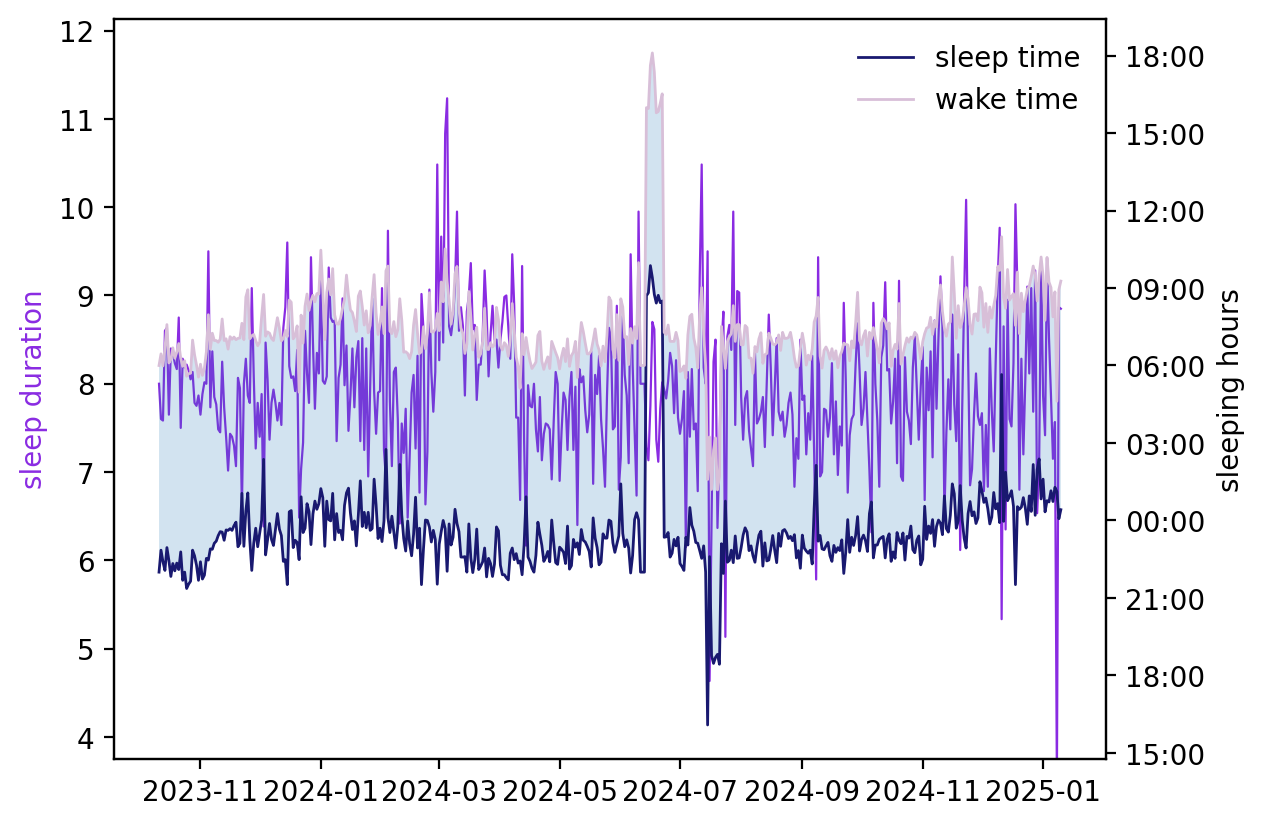

In [279]:
fig, ax = plt.subplots(dpi=200)
duration_color = 'blueviolet'
ax.plot(dates,sleep_duration_hrs, color=duration_color, lw=0.8) #, label='sleep duration')
ax.set_ylim((mean_hrs - 5*std_hrs, mean_hrs + 5*std_hrs))
ax2 = ax.twinx()

# ax2.plot(dates,sleep_duration_hrs)
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax2.fill_between(dates, sleep_start_time, sleep_end_time, alpha=0.2)
ax2.plot(dates, sleep_start_time, color='midnightblue', label='sleep time', lw=1)
ax2.plot(dates, sleep_end_time, color='thistle', label='wake time', lw=1)

mean_hrs = np.mean(sleep_duration_hrs)
std_hrs = np.std(sleep_duration_hrs)

ax.set_ylabel("sleep duration", color=duration_color)
# ax.set_xticklabels(ax.get_xticks(), rotation = 50) # doesn't work with datetime?
ax2.set_ylabel("sleeping hours")
# ax.legend()
ax2.legend(frameon=False)

In [275]:
ax2.legend?

Signature: ax2.legend(*args, **kwargs)
Docstring:
Place a legend on the Axes.

Call signatures::

    legend()
    legend(handles, labels)
    legend(handles=handles)
    legend(labels)

The call signatures correspond to the following different ways to use
this method:

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

.. note::
    Specific artists can be excluded from the automatic legend element
    selection by using a label starting with an underscore, "_".
    A string starting with an underscore is the default label for all
    artis